In [20]:
import matplotlib.pyplot as plt
import gudhi
import numpy as np
from distance import *
import umap

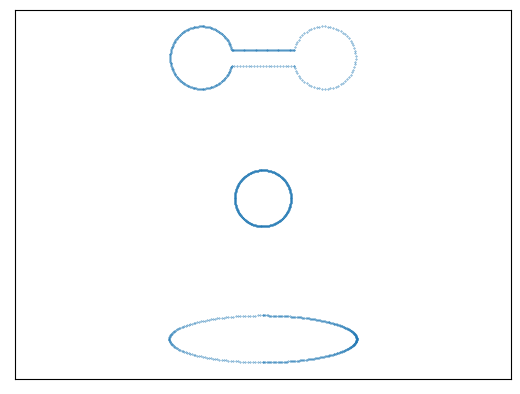

In [32]:
def select_top_intervel(diag,k=10):
    #  select top k longest intervels in the 1-dim barcode
    tmp_diag = np.array([x[1] for x in diag])
    persistence = tmp_diag[:,1]-tmp_diag[:,0]
    idx = np.argpartition(persistence, -k)[-k:]

    return np.array([[1,x] for x in tmp_diag[idx,:]])

def make_vd_eyeglass():
    # Generate eyeglasses dataset 
    ratio = 3
    a_ = np.pi/12
    num_1 = 200
    a_lst = np.linspace(a_,2*np.pi-a_,num=num_1)
    a_lst2 = np.linspace(a_,2*np.pi-a_,num=int(num_1/ratio))
    r = 2
    c1 = np.array([[r*np.cos(a),r*np.sin(a)] for a in a_lst])
    c1 = c1-np.array([[r+r*np.cos(a_),0]])

    c2 = np.array([[r*np.cos(a),r*np.sin(a)] for a in a_lst2])
    c2 = c2-np.array([[r+r*np.cos(a_),0]])
    c2[:,0] = -1*c2[:,0]

    num_2 = int(num_1*4/(2*np.pi*r*(1-a_/np.pi)))
    
    line_base = np.linspace(-2,2,num=num_2)
    line_base2 = np.linspace(-2,2,num = int(num_2/ratio))
    line_1 = np.array([[x,r*np.sin(a_)] for x in line_base])
    line_2 = np.array([[x,-1*r*np.sin(a_)] for x in line_base2])
    X = np.concatenate([c1,line_1,c2,line_2],axis=0)

    m = c1.shape[0]+line_1.shape[0]
    X = X/6
    idx_1 = np.arange(m)
    idx_2 = np.arange(m,X.shape[0])
    return X,idx_1,idx_2

def make_ellipse_vd():
    # Generate ellipse dataset
    u=0    #x-position of the center
    v=0    #y-position of the center
    a=1     #radius on the x-axis
    b=0.25  #radius on the y-axis

    a1_lst = np.linspace(-np.pi/2,np.pi/2,240)
    a2_lst = np.linspace(np.pi/2,3*np.pi/2,118)

    X1 = np.array([[u+a*np.cos(t) , v+b*np.sin(t)] for t in a1_lst])
    X2 = np.array([[u+a*np.cos(t) , v+b*np.sin(t)] for t in a2_lst])
    X = np.r_[X1,X2]
    return X

def make_perfect_ring(n):
    # Gerneate ring dataset
    r = 0.3
    X = np.array([[r*np.cos(a),r*np.sin(a)] for a in np.linspace(0,2*np.pi,num=n)])
    return X


X_1 = make_vd_eyeglass()[0]+np.array([[0,1.5]])
X_2 = make_ellipse_vd()-np.array([[0,1.5]])
X_3 = make_perfect_ring(358)
# concatenate ring,ellipse,eyeglasses into one point cloud
# ellipse,eyeglasses can be seen as a point cloud deformed from the ring dataset
X = np.r_[X_2,X_1,X_3]*10

plt.scatter(X[:,0],X[:,1],s=0.1)
plt.xticks([]),plt.yticks([])
plt.axis('equal')
plt.show()

In [ ]:
X_ = umap.UMAP(min_dist=0.01,local_connectivity=10,n_neighbors=20,n_components=2).fit(X)
X = X_.embedding_
dm ,cc= compute_Riemannian_distance(X,5)

In [35]:
a = 0 # Lambda:1 Lambda-PLS: 0
dm = compute_lambda_distance(dm,eta=-1,psi=24,t=1000,P=cc,alpha=a)
# dm = compute_cknn_distance(-1,0.1,dm=dm,k=None)

[0 1]


In [36]:
diag,diag_0,diag_1 = get_pd_dm(dm) # compute Persistence Diagram

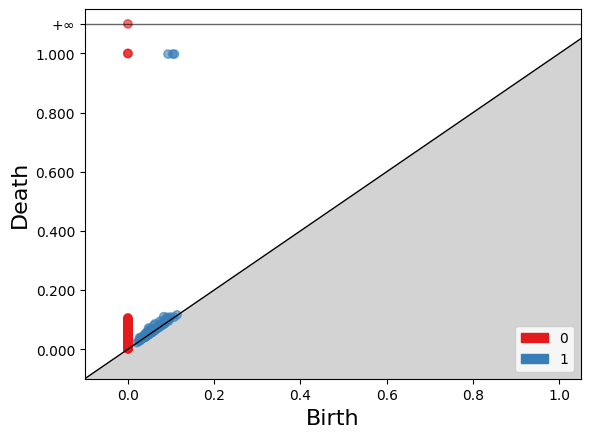

In [37]:
fig = gudhi.plot_persistence_diagram(diag,legend=True)
fig.set_title('')
plt.show()

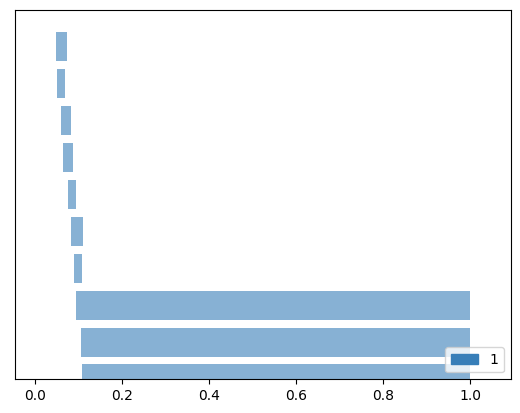

In [38]:
diag_final = select_top_intervel(diag_1,10)
fig = gudhi.plot_persistence_barcode(diag_final,legend=True)
fig.set_title('')
plt.yticks([])
plt.show()